In [3]:
#started : Deep Learning

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

# keras.backend.backend()


In [4]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

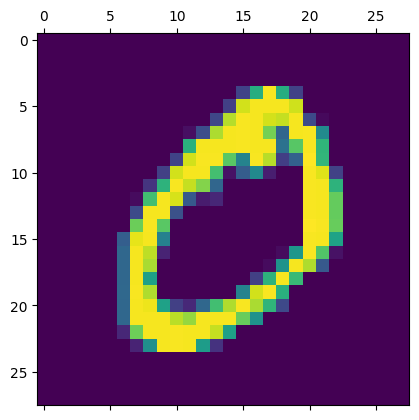

In [9]:
plt.matshow(X_train[1])

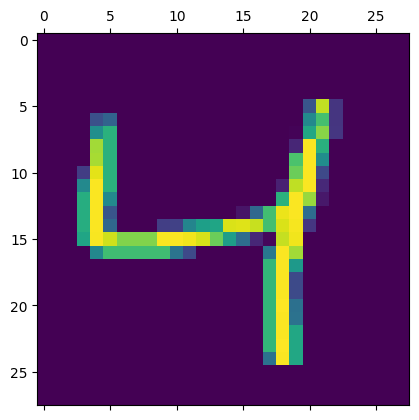

In [10]:
plt.matshow(X_train[2])

In [11]:
y_train[2]

4

In [13]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [14]:
X_train.shape 

(60000, 28, 28)

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
X_train_flattened = X_train.reshape(len(X_train) , 28*28)
X_test_flattened = X_test.reshape(len(X_test) , 28*28)
X_train_flattened.shape
X_test_flattened.shape
print(X_test_flattened[0])
print(X_train_flattened[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [17]:
#Creating neural network : 
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape=(784 , ), activation='sigmoid')
])
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened , y_train , epochs=5)


Epoch 1/5
1875/1875 [==============================] - 2s 888us/step - loss: 0.4654 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2727 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2670 - accuracy: 0.9257


In [18]:
model.evaluate(X_test_flattened , y_test)

313/313 [==============================] - 0s 898us/step - loss: 0.2690 - accuracy: 0.9260


[0.26900821924209595, 0.9259999990463257]

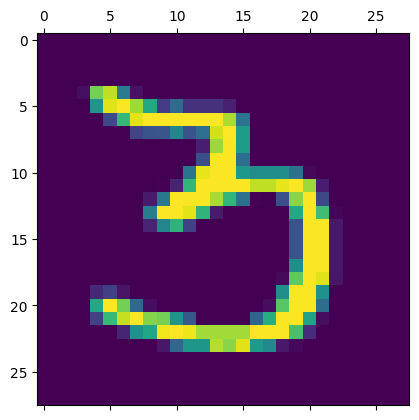

In [19]:
plt.matshow(X_test[780])  

In [20]:
y_predicted = model.predict(X_test_flattened)
# print(len(y_predicted))

#Among last ten outputs 0 to 9 which one is having maximum value is considered as predicted value!
y_predicted[780]

313/313 [==============================] - 0s 665us/step


array([1.1189729e-01, 1.8297841e-03, 2.2898614e-02, 9.9506688e-01,
       2.2493780e-04, 3.8454401e-01, 3.3512962e-04, 3.0352979e-03,
       6.9476431e-03, 2.8195882e-03], dtype=float32)

In [21]:
#Predicted Value : 
np.argmax(y_predicted[780])

3

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
# y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
#Confusion Matrix : 
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   6,    7,  932,   17,    6,    2,   13,    8,   36,    5],
       [   4,    0,   22,  921,    0,   21,    2,   10,   21,    9],
       [   1,    1,    5,    2,  902,    0,   11,    4,    8,   48],
       [  12,    2,    2,   36,    8,  766,   19,    7,   32,    8],
       [  15,    3,    7,    1,    7,    7,  913,    2,    3,    0],
       [   2,    5,   23,    8,    5,    0,    0,  944,    3,   38],
       [   6,    6,    7,   17,    9,   20,   11,   11,  878,    9],
       [  10,    7,    1,   10,   21,    4,    0,   15,    8,  933]])>

Text(95.72222222222221, 0.5, 'Truth')

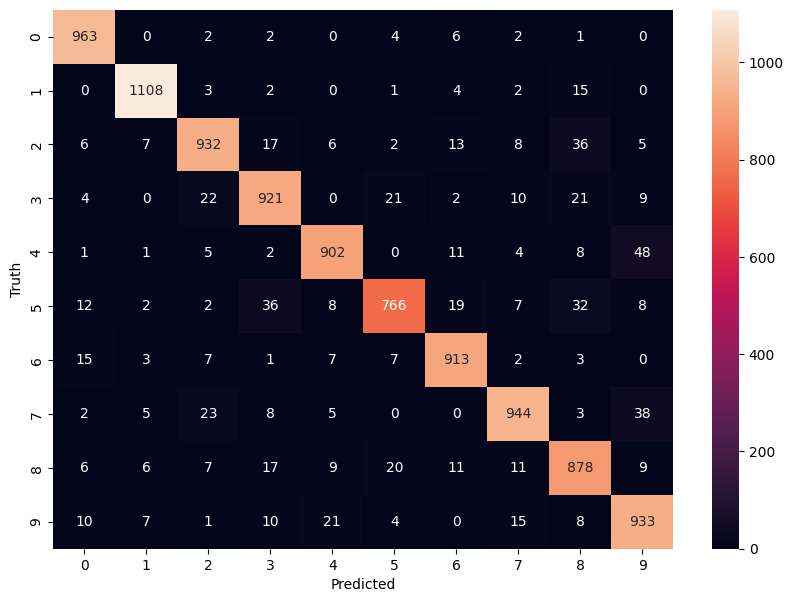

In [24]:
import seaborn as sb
plt.figure(figsize=(10 , 7))
sb.heatmap(cm , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
#Add Hidden Layer to the Previous Model : 

model = keras.Sequential([
    keras.layers.Dense(100 , input_shape=(784 , ), activation='relu'),#Let, Hidden layer size=100
    keras.layers.Dense(10 , activation='sigmoid')
])
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened , y_train , epochs=5)



Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2684 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1233 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0859 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0664 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0531 - accuracy: 0.9838


In [26]:
model.evaluate(X_test_flattened , y_test)
# With 97% testing accuracy !!

313/313 [==============================] - 0s 1ms/step - loss: 0.0796 - accuracy: 0.9766


[0.0795682966709137, 0.9765999913215637]

313/313 [==============================] - 0s 747us/step


Text(95.72222222222221, 0.5, 'Truth')

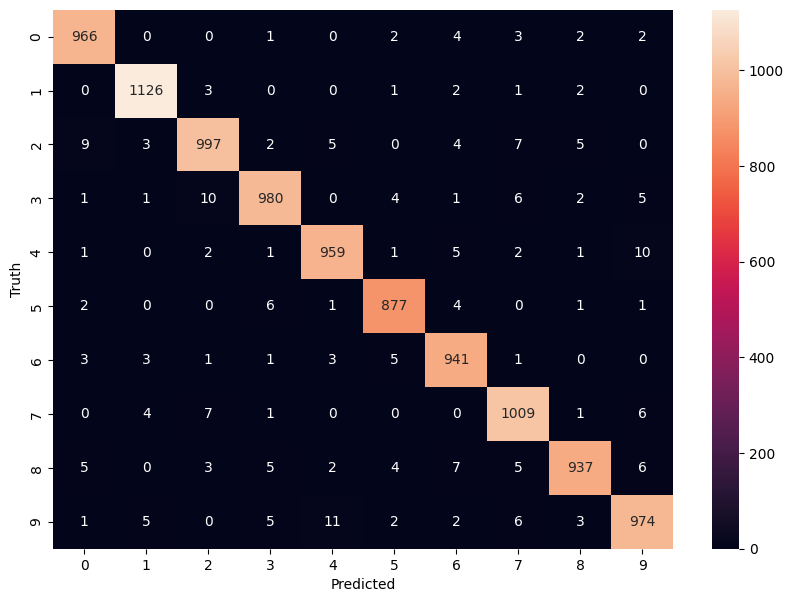

In [28]:
# More accurate Heatmap !!(With hidden layer)
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_labels)

plt.figure(figsize=(10 , 7))
sb.heatmap(cm , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 802us/step


array([[1.5887508e-01, 2.2400463e-04, 1.6918030e-01, ..., 9.9999112e-01,
        3.1182382e-02, 1.9056644e-01],
       [2.8036414e-03, 9.9681830e-01, 9.9999720e-01, ..., 3.0880756e-07,
        9.0660608e-01, 2.9734910e-08],
       [5.5044686e-04, 9.9902982e-01, 2.6370904e-01, ..., 5.6020546e-01,
        3.8016382e-01, 1.1805941e-02],
       ...,
       [6.6419445e-05, 3.8923314e-05, 7.8561357e-07, ..., 3.6748886e-01,
        3.8551071e-01, 9.4499820e-01],
       [2.7226698e-02, 3.5344332e-03, 1.9120337e-06, ..., 1.4207149e-01,
        9.9634224e-01, 1.7363681e-03],
       [2.1237557e-01, 1.5391702e-04, 3.7193316e-01, ..., 1.7803060e-07,
        4.4856244e-03, 3.1477192e-03]], dtype=float32)

In [32]:
print(y_test[780])#Actual label
print(y_predicted[780]) # From 0 to 9 max probability value number would be considered as predicted number!
np.argmax(y_predicted[780]) #Predicted Label

3
[1.7811602e-04 1.9607010e-01 3.0485481e-01 9.9989700e-01 5.0167160e-05
 6.4551938e-01 9.8264843e-07 4.8507171e-04 2.2303330e-02 2.9609016e-01]


3